In [ ]:
import pandas as pd
import cv2
import numpy as np
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__


'2.15.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Material.zip"
zip = zipfile.ZipFile(path, 'r')
zip.extractall('./')
zip.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/MyDrive/Material.zip' mode='r'>>

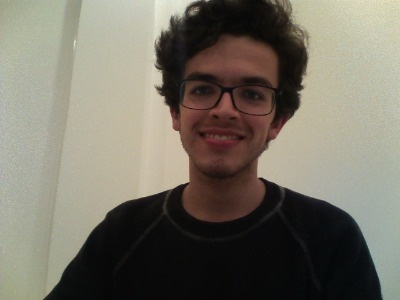

In [ ]:
imagem = cv2.imread('Material/testes/teste_gabriel.png')
cv2_imshow(imagem)

In [ ]:
cascade = "/content/Material/haarcascade_frontalface_default.xml"
modeloPath = "/content/Material/modelo_01_expressoes.h5"
face_detection = cv2.CascadeClassifier(cascade)
model = load_model(modeloPath, compile = False)
expressoes = ["raiva", "nojo", "medo", "feliz", "triste", "surpreso", "neutro"]
#se carrega o modelo e o método do cascadeclassifier que identifica objetos independente do tamanho deles

In [ ]:
original = imagem.copy()
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1, minNeighbors = 5, minSize = (20,20))
faces
#aplica o cascade classifier várias vezes na mesma imagem pois há mais de um elemento a ser analisado

array([[162,  40, 128, 128]], dtype=int32)

In [ ]:
faces.shape

(1, 4)

In [ ]:
len(faces)

1

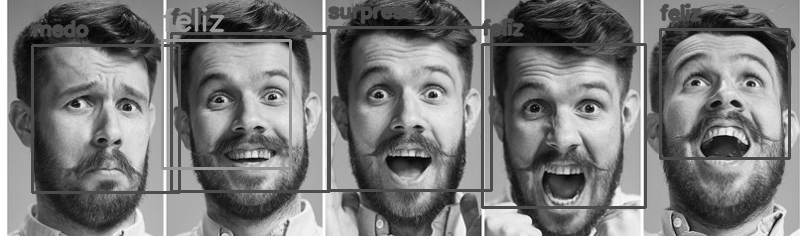

In [ ]:
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
cv2_imshow(cinza)

In [ ]:
roi = cinza[40:40 + 128, 162:162 + 128]
#utiliza os vetores gerados na facedetection para extrair a região de interesse, retornando uma imagem com a melhor proporção entre tamanho/características

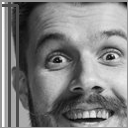

In [ ]:
cv2_imshow(roi)

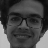

In [ ]:
roi = cv2.resize(roi, (48, 48))
cv2_imshow(roi)

In [ ]:
roi = roi.astype("float") /255
roi = img_to_array(roi)
roi = np.expand_dims(roi, axis = 0)


In [ ]:
preds = model.predict(roi)[0]
preds

1/1 [==============================] - 0s 227ms/step


array([1.6802096e-05, 5.7679665e-09, 1.1206557e-05, 9.9066460e-01,
       1.8033754e-05, 1.8518243e-05, 9.2708124e-03], dtype=float32)

In [ ]:
prob = np.max(preds)
label = expressoes[np.argmax(preds)]
label
#realiza uma predição na area de interesse e retorna o indice de maior valor no array, associando-o ao vetor label para categorizá-lo em relação aos sentimentos

'feliz'

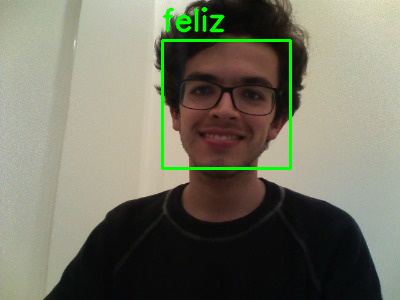

In [ ]:
cv2.putText(original, label, (162, 40-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
cv2.rectangle(original, (162, 40), (162+128, 40 + 128), (0, 255, 0), 2)
cv2_imshow(original)

array([[255, 255, 255, ..., 142, 135, 165],
       [255, 255, 255, ..., 142, 136, 165],
       [255, 255, 255, ..., 142, 136, 165],
       ...,
       [255, 254, 253, ..., 240, 235, 242],
       [255, 255, 254, ..., 239, 236, 245],
       [253, 254, 255, ..., 240, 237, 244]], dtype=uint8)
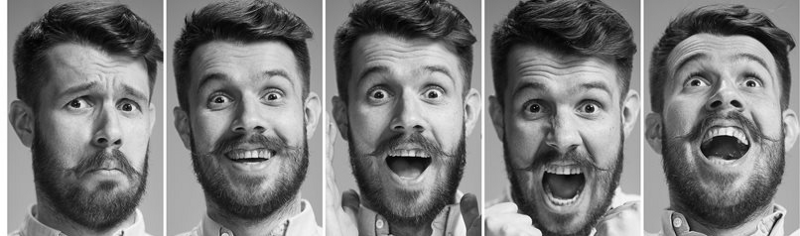

In [ ]:
imag = cv2.imread('Material/testes/teste01.png')
face = face_detection.detectMultiScale(imag, scaleFactor = 1.1, minNeighbors = 5, minSize = (20,20))
cinza = cv2.cvtColor(imag, cv2.COLOR_BGR2GRAY)
original = imag.copy()

cinza

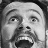

1/1 [==============================] - 0s 35ms/step
[7.8443103e-03 1.5464441e-04 7.0808366e-02 7.4692351e-01 1.6651674e-03
 1.7088430e-01 1.7196917e-03]
0.7469235
feliz


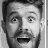

1/1 [==============================] - 0s 36ms/step
[1.0294173e-02 1.7985894e-04 3.2855803e-01 2.4662589e-01 1.2978880e-03
 4.1240034e-01 6.4379716e-04]
0.41240034
surpreso


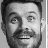

1/1 [==============================] - 0s 37ms/step
[2.0797981e-03 9.4365978e-06 1.3799014e-03 9.0104491e-01 2.1679797e-03
 1.4511482e-03 9.1866873e-02]
0.9010449
feliz


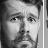

1/1 [==============================] - 0s 35ms/step
[8.8384477e-03 3.3966854e-04 8.4687382e-01 2.1701117e-05 1.3366540e-01
 6.8983510e-03 3.3624908e-03]
0.8468738
medo


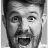

1/1 [==============================] - 0s 36ms/step
[0.01760916 0.00081658 0.16498348 0.54209644 0.00508807 0.26427865
 0.00512762]
0.54209644
feliz


In [ ]:
for (x, y, w, h) in face:
  #para extrair a região de interesse foi utilizada a mesma fórmula apresentada no exemplo passado
  roi = cinza[y:y + h, x:x + w]

  roi = cv2.resize(roi, (48, 48))

  cv2_imshow(roi)

  roi = roi.astype("float") / 255
  roi = img_to_array(roi)
  roi = np.expand_dims(roi, axis = 0)


  preds = model.predict(roi)[0]
  print(preds)

  prob = np.max(preds)
  print(prob)


  label = expressoes[preds.argmax()]
  print(label)
